# Wifind Datasets

### Author_: Christian Rosado

# Data to have on hand:
* https://www1.nyc.gov/site/planning/data-maps/open-data.page
* https://data.cityofnewyork.us/Social-Services/LinkNYC-Map/tgrn-h24f/data
* https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page
* NYC census data:  http://maps.nyc.gov/census/
    * http://data.beta.nyc/dataset/median-household-income-2010-census-tracts/resource/92bbc70e-2b4e-40aa-8a1f-d39b11124b49
* Section 8 vouchers data: http://wordondastreet.com/hasidic-neighborhood-exposed-as-top-section-8-beneficiary-pushing-blacks-latinos-out-of-brooklyn/ 
    * New York City’s 123,000 vouchers make this the largest Section 8 voucher program in the country. Reluctant landlords and rising rents are making vouchers nearly impossible to use in many areas of the city. Tenants, especially larger families, are often relegated to the edges of Brooklyn and the Bronx. That’s why this cluster of Hasidic households stands out.
    * The neighborhood is home to one of the highest concentrations of Section 8 housing vouchers in the city, according to federal data analyzed by WNYC and the Daily News. In several of its census tracts, Section 8 tenants compose more than 30% of residents, a level reached only in scattered pockets of the Bronx.
    * https://catalog.data.gov/dataset/active-multifamily-portfolio-property-level-data
    * https://catalog.data.gov/dataset/public-housing-agency-pha-inventory
    * https://catalog.data.gov/dataset/fair-market-rents-for-the-section-8-housing-assistance-payments-program
    * Hasidic neighborhood in South Williamsburg is a top beneficiary of Section 8, but some question whether law is strictly followed
        * http://www.nydailynews.com/new-york/hasidic-neighborhood-b-klyn-top-beneficiary-section-8-article-1.2639120
* https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b/data

# Needed variables:
* Total Population
* Population Density
* House Hold Density
* Median Household Income
* Wifi Counts (open and other)
* Poverty Level
* Section 8 (T/F)
* Location (lat, long)
    

In [ ]:
# NYC_Street_Centerline_(CSCL)
shape_path = "../Downloads/NYC_Street_Centerline_(CSCL)/geo_export_5354736e-3527-44b9-bb36-7ba27a36cab2.shp"
NYC_Street = GeoDataFrame.from_file(shape_path)

In [ ]:
# non-open networks map with street overlay
f,ax = pl.subplots(figsize=(20,10))
BKMapPLUTO[::10].plot(ax=ax, color="#DDDDDD")
housing_projects[housing_projects.developmen == "SUMNER"].plot(ax=ax, color="#0074D9")
housing_projects[housing_projects.developmen.str.contains("ROOSEVELT I")].plot(ax=ax, color="#0074D9")
#housing_projects[housing_projects.developmen.str.contains("ROOSEVELT II")].plot(ax=ax, color="white")
housing_projects[housing_projects.developmen.str.contains("303 VERNON AVENUE")].plot(ax=ax, color="#0074D9")
housing_projects[housing_projects.developmen.str.contains("TOMPKINS")].plot(ax=ax, color="#0074D9")
bklyn_housing[::100].plot(column='developmen', markersize=10, ax=ax, legend=True)

#BKMapPLUTO[BKMapPLUTO.Address.str.contains("VERNON")].plot(ax=ax, color="#7FDBFF")
#BKMapPLUTO[BKMapPLUTO.Address.str.contains("MARCUS GARVEY")].plot(ax=ax, color="#7FDBFF")
#NYC_Street[::10].plot(ax=ax, color="#7FDBFF")
plt.title("Collected Wifi Networks (Points) in Selected Low-Income Housing Projects", fontsize=30)
ax.set_ylabel('Latitude', fontsize=18)
ax.set_xlabel("Longitude", fontsize=18)
ax.set_xlim([-73.948, -73.932])
ax.set_ylim([40.6900, 40.7025])

In [1]:
# imports
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from fiona.crs import from_epsg
import shapely as shp
import seaborn 
import os
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
link_NYC = pd.read_csv("LinkNYC_Map.csv")

In [ ]:
link_NYC.head()

In [3]:
#original_data["geometry"] = "POINT (" + original_data.lng + " " + original_data.lat + ")"
link_NYC["geometry"] = " "

In [4]:
for n, p in enumerate(zip(link_NYC.Latitude, link_NYC.Longitude)):
    link_NYC["geometry"].iloc[n] = shp.geometry.Point(p)

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
link_NYC.head()

In [5]:
# NYC_Street_Centerline_(CSCL)
shape_path = "../Downloads/NYC_Street_Centerline_(CSCL)/geo_export_5354736e-3527-44b9-bb36-7ba27a36cab2.shp"
NYC_Street = GeoDataFrame.from_file(shape_path)

In [ ]:
NYC_Street.l_zip.head()

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
df = df.drop(['Lon', 'Lat'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

In [6]:
geo_link_NYC = GeoDataFrame(link_NYC, crs={'init': 'epsg:4326'}, geometry=link_NYC.geometry)

In [7]:
geo_link_NYC.crs = NYC_Street.crs

In [8]:
NYC_Street.crs

{'init': 'epsg:4326'}

In [9]:
geo_link_NYC.crs

{'init': 'epsg:4326'}

(40.69, 40.7025)

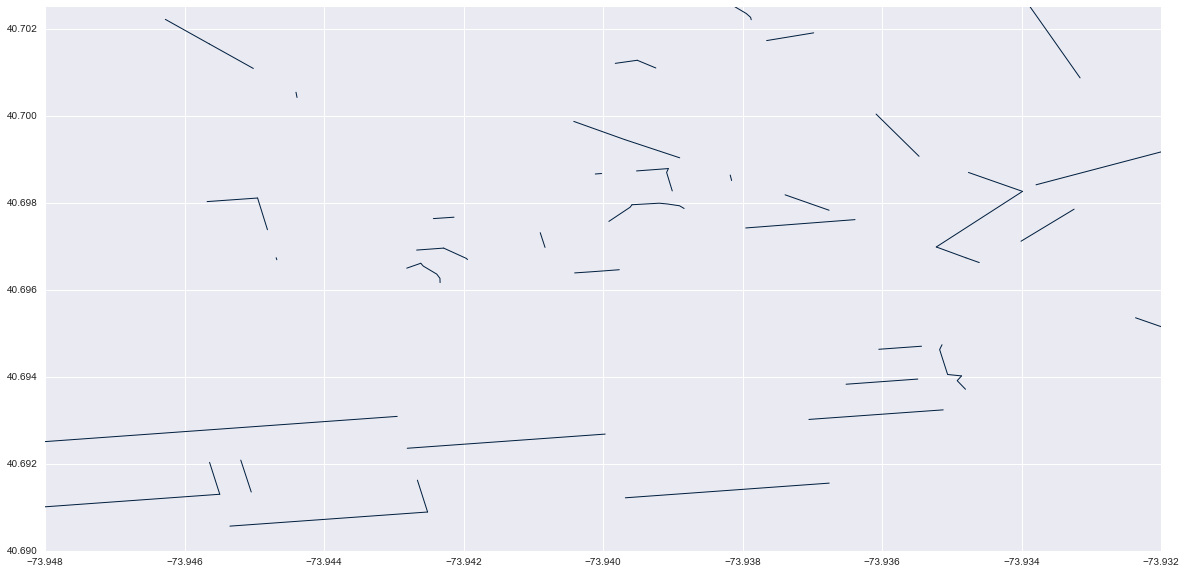

In [18]:
f,ax = pl.subplots(figsize=(20,10))
geo_link_NYC[::100].plot(ax=ax, color="#01FF70")
NYC_Street[::10].plot(ax=ax, color="#001f3f")
ax.set_xlim([-73.948, -73.932])
ax.set_ylim([40.6900, 40.7025])